In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from collections import Counter

In [ ]:
df=pd.read_csv('/content/bt_dataset_t3.csv')
df

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Image1640,0.199158,26.491880,5.147026,0.996341,25.826301,668.181974,14.797350,0.997873,0.995751,0.998476,0.113842,0.755553,7.458341e-155,75.822768,0.995798,0.001701,0.000000,0
1640,Image1641,6.885025,802.478515,28.328052,0.878419,3.939967,16.456794,266.135425,0.927687,0.860602,0.951086,2.303173,0.854682,7.458341e-155,60.126401,0.886831,0.063160,0.000000,0
1641,Image1642,1.828186,230.107684,15.169301,0.966424,8.218790,68.539071,105.172699,0.980371,0.961128,0.985590,0.863250,0.799919,7.458341e-155,66.013000,0.964771,0.016285,0.000000,0
1642,Image1643,0.061630,8.029570,2.833650,0.998740,45.985085,2116.600001,6.431276,0.999268,0.998536,0.999401,0.050628,0.649484,7.458341e-155,80.821412,0.998316,0.000538,0.000000,0


#**Part 1,2**#

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df.set_index(['Image'], inplace=True) # set the image column as an index variable

**Missing values**

In [ ]:
df.isnull().sum().sum()

1205

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, Image1 to Image1644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                1644 non-null   float64
 1   Variance            1644 non-null   float64
 2   Standard Deviation  1644 non-null   float64
 3   Entropy             1644 non-null   float64
 4   Skewness            1275 non-null   float64
 5   Kurtosis            1275 non-null   float64
 6   Contrast            1644 non-null   float64
 7   Energy              1644 non-null   float64
 8   ASM                 1644 non-null   float64
 9   Homogeneity         1644 non-null   float64
 10  Dissimilarity       1644 non-null   float64
 11  Correlation         1644 non-null   float64
 12  Coarseness          1644 non-null   float64
 13  PSNR                1644 non-null   float64
 14  SSIM                1275 non-null   float64
 15  MSE                 1644 non-null   float64
 16  D

In [ ]:
df['Kurtosis'].value_counts() # see the value types(we can all of them are numeric)

76.057606      1
108.743853     1
47.238022      1
4.254855       1
89.961281      1
              ..
57.469334      1
74.146226      1
61.756034      1
2339.084836    1
70.047617      1
Name: Kurtosis, Length: 1275, dtype: int64

In [ ]:
df["Kurtosis"].fillna(method="backfill", inplace = True) # first column with null values, and filling it will backfill method


In [ ]:
df.info() # check again to make sure it was filled with or not

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, Image1 to Image1644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                1644 non-null   float64
 1   Variance            1644 non-null   float64
 2   Standard Deviation  1644 non-null   float64
 3   Entropy             1644 non-null   float64
 4   Skewness            1275 non-null   float64
 5   Kurtosis            1644 non-null   float64
 6   Contrast            1644 non-null   float64
 7   Energy              1644 non-null   float64
 8   ASM                 1644 non-null   float64
 9   Homogeneity         1644 non-null   float64
 10  Dissimilarity       1644 non-null   float64
 11  Correlation         1644 non-null   float64
 12  Coarseness          1644 non-null   float64
 13  PSNR                1644 non-null   float64
 14  SSIM                1275 non-null   float64
 15  MSE                 1644 non-null   float64
 16  D

In [ ]:
df["Skewness"].fillna(method="backfill", inplace = True) # second column

In [ ]:
df["SSIM"].fillna(method="backfill", inplace = True) # third column

In [ ]:
df["DC"].fillna(method="backfill", inplace = True) # last column

In [ ]:
df.info() # we filled all null values with backfill method 

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, Image1 to Image1644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                1644 non-null   float64
 1   Variance            1644 non-null   float64
 2   Standard Deviation  1644 non-null   float64
 3   Entropy             1644 non-null   float64
 4   Skewness            1644 non-null   float64
 5   Kurtosis            1644 non-null   float64
 6   Contrast            1644 non-null   float64
 7   Energy              1644 non-null   float64
 8   ASM                 1644 non-null   float64
 9   Homogeneity         1644 non-null   float64
 10  Dissimilarity       1644 non-null   float64
 11  Correlation         1644 non-null   float64
 12  Coarseness          1644 non-null   float64
 13  PSNR                1644 non-null   float64
 14  SSIM                1644 non-null   float64
 15  MSE                 1644 non-null   float64
 16  D

**Duplicates**

In [ ]:
df.drop_duplicates()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
Image,,,,,,,,,,,,,,,,,,
Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image1640,0.199158,26.491880,5.147026,0.996341,25.826301,668.181974,14.797350,0.997873,0.995751,0.998476,0.113842,0.755553,7.458341e-155,75.822768,0.995798,0.001701,0.000000,0
Image1641,6.885025,802.478515,28.328052,0.878419,3.939967,16.456794,266.135425,0.927687,0.860602,0.951086,2.303173,0.854682,7.458341e-155,60.126401,0.886831,0.063160,0.000000,0
Image1642,1.828186,230.107684,15.169301,0.966424,8.218790,68.539071,105.172699,0.980371,0.961128,0.985590,0.863250,0.799919,7.458341e-155,66.013000,0.964771,0.016285,0.000000,0


In [ ]:
df.isnull().sum().sum()

0

**CATEGORICAL VARIABLE**

In [ ]:
df['Target'].value_counts() # target column which can tell the image has a tumor or not

1    1449
0     195
Name: Target, dtype: int64

In [ ]:
len_ = len(df)

In [ ]:
#number of non positive tumors 
(df['Target']==0).sum()

195

In [ ]:
# created a filter of number of non positive tumors
pos_tum = df['Target'] == 0

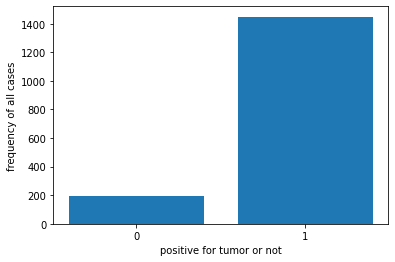

In [ ]:
plt.bar([0, 1], [(df['Target']==0).sum(), len_-(df['Target']==0).sum()])
plt.xticks([0, 1])
plt.ylabel('frequency of all cases')
plt.xlabel('positive for tumor or not')
plt.show()

From here we can see that positive for tumor cases are more frequent than the non positive for tumor cases( Positive cases are 1465 and negative cases are 195)

**NUMERICAL VARIABLE**

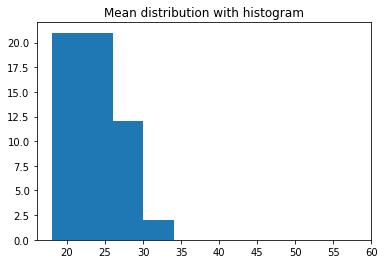

In [ ]:
plt.hist(df.loc[~pos_tum, 'Mean'], bins=np.arange(18, 60, 4));
plt.title('Mean distribution with histogram');

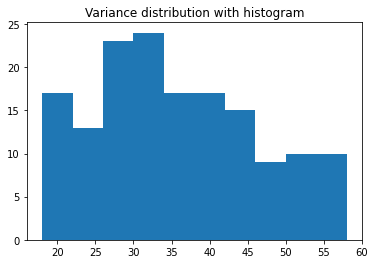

In [ ]:
plt.hist(df.loc[~pos_tum, 'Variance'], bins=np.arange(18, 60, 4));
plt.title('Variance distribution with histogram');

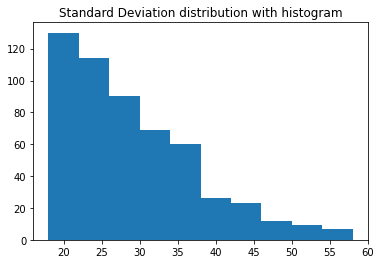

In [ ]:
plt.hist(df.loc[~pos_tum, 'Standard Deviation'], bins=np.arange(18, 60, 4));
plt.title('Standard Deviation distribution with histogram');

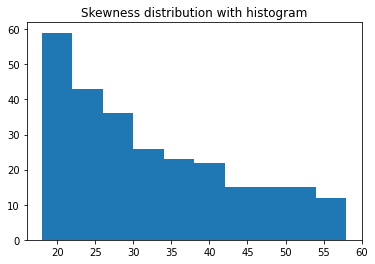

In [ ]:
plt.hist(df.loc[~pos_tum, 'Skewness'], bins=np.arange(18, 60, 4));
plt.title('Skewness distribution with histogram');

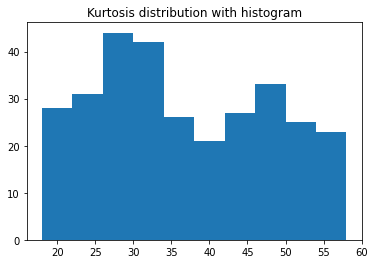

In [ ]:
plt.hist(df.loc[~pos_tum, 'Kurtosis'], bins=np.arange(18, 60, 4));
plt.title('Kurtosis distribution with histogram');

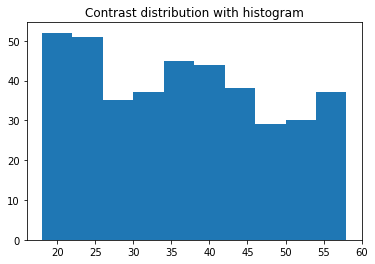

In [ ]:
plt.hist(df.loc[~pos_tum, 'Contrast'], bins=np.arange(18, 60, 4));
plt.title('Contrast distribution with histogram');

**DATA EXPOLATORY**

In [ ]:
# Mean vs diagnosis
df[["Mean","Target"]].groupby(["Mean"],as_index=False).mean().sort_values(by="Target",ascending=False)

,Mean,Target
636,1.826401,1.0
817,3.178207,1.0
824,3.244263,1.0
823,3.230042,1.0
822,3.214905,1.0
...,...,...
1206,18.029953,0.0
1205,17.811386,0.0
1204,17.728073,0.0
1203,17.519821,0.0


In [ ]:
# Variance vs diagnosis
df[["Variance","Target"]].groupby(["Variance"],as_index=False).mean().sort_values(by="Target",ascending=False)

,Variance,Target
637,280.429184,1.0
819,481.497432,1.0
827,493.035673,1.0
826,489.995278,1.0
825,489.382789,1.0
...,...,...
1079,998.972243,0.0
167,22.333591,0.0
1082,1006.486825,0.0
1205,1634.918516,0.0


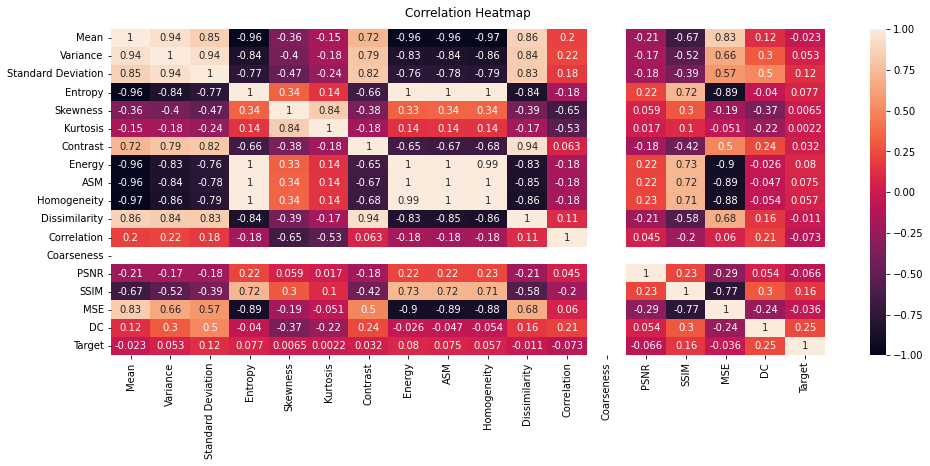

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**The most correlated ones with target variable are DC, SSIM, Standard Deviation**

**The least correlated ones are Mean, Dissimilarity, Correlation, PCNR, MSE**

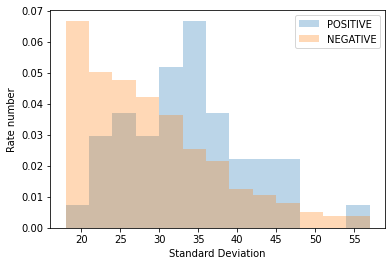

In [ ]:
plt.hist(df.loc[pos_tum, 'Standard Deviation'], label='POSITIVE',
         bins=np.arange(18, 60, 3),alpha=0.3, density=True)
plt.hist(df.loc[~pos_tum, 'Standard Deviation'], label='NEGATIVE',
         bins=np.arange(18, 60, 3), alpha=0.3, density=True)
plt.xlabel('Standard Deviation')
plt.ylabel('Rate number')
plt.legend()
plt.show()

In [ ]:
res_pos = np.unique(df.loc[pos_tum, 'Mean'], return_counts=True)
res_neg = np.unique(df.loc[~pos_tum, 'Mean'], return_counts=True)

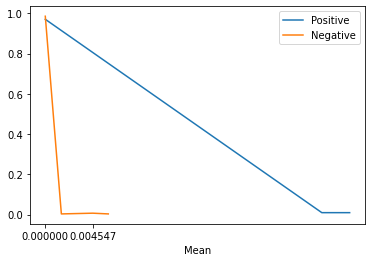

In [ ]:
max_DC = 4

plt.plot(res_pos[0][:max_DC], res_pos[1][:max_DC]/res_pos[1][:max_DC].sum(), label='Positive')
plt.plot(res_neg[0][:max_DC], res_neg[1][:max_DC]/res_neg[1][:max_DC].sum(), label='Negative')
plt.legend()
plt.xlabel('Mean')
plt.xticks(res_neg[0][:max_DC:2])
plt.show()

**OUTLIER DETECTION**

In [ ]:
def detect_outliers(dfl, features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(dfl[c],25)
        #3rd quartile
        Q3 = np.percentile(dfl[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = dfl[(dfl[c] < Q1 - outlier_step) | (dfl[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [ ]:
df.loc[detect_outliers(df,["Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness","PSNR","SSIM","MSE","DC"])]

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
Image,,,,,,,,,,,,,,,,,,
Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0
Image7,11.350555,998.972243,31.606522,0.761106,2.533920,7.394586,303.947978,0.854277,0.729789,0.902355,3.440551,0.866480,7.458341e-155,99.206579,0.794881,0.128889,0.000000,0
Image16,17.811386,1219.680747,34.923928,0.610209,1.690158,4.152791,107.296792,0.753242,0.567373,0.836566,2.359170,0.961286,7.458341e-155,96.578527,0.719920,0.236059,0.000000,0
Image25,11.623871,599.609692,24.486929,0.657436,1.774659,4.142207,53.437692,0.785695,0.617317,0.892227,1.185146,0.960809,7.458341e-155,54.986498,0.758534,0.206267,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image1641,6.885025,802.478515,28.328052,0.878419,3.939967,16.456794,266.135425,0.927687,0.860602,0.951086,2.303173,0.854682,7.458341e-155,60.126401,0.886831,0.063160,0.000000,0
Image1146,7.951401,1108.889502,33.299993,0.881140,4.027700,17.205369,377.300314,0.929350,0.863692,0.946501,2.813877,0.850917,7.458341e-155,60.848111,0.895284,0.053490,0.231479,1
Image1413,7.214188,884.559681,29.741548,0.880720,3.955053,16.606880,239.604079,0.929085,0.863200,0.953878,2.037378,0.881310,7.458341e-155,61.555332,0.910005,0.045451,0.508818,1


In [ ]:
# drop Outliers
df = df.drop(detect_outliers(df,["Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness","PSNR","SSIM","MSE","DC"]),axis=0).reset_index(drop=True)

In [ ]:
df.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
1,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
2,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.458341e-155,inf,NaN,0.000000,NaN,0
3,0.405136,68.378718,8.269143,0.994724,20.388025,416.843433,17.789156,0.996932,0.993873,0.997885,0.114400,0.886144,7.458341e-155,111.371193,0.985175,0.007830,0.410458,1
4,5.955872,937.438650,30.617620,0.926931,5.015434,26.150440,57.226813,0.956961,0.915774,0.974157,0.507706,0.973263,7.458341e-155,111.439129,0.981891,0.007708,0.914484,1


#**PART 3**#